In [138]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
import matplotlib.pyplot as plt
import json
import tomllib

warnings.filterwarnings("ignore", category=FutureWarning)

In [139]:
# Load configuration and data
configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.head()
df.dtypes

timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object

# Example User Stories & Correlations

In [140]:
print(df.dtypes)


timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object


In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# --- Load metadata ---
with open("nested_users5.json", "r") as f:
    nested_users = json.load(f)

# Convert dictionary to a DataFrame
author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# --- Merge WhatsApp data with user info ---
df_merged = df.merge(author_info_df, on='author', how='left')

# --- Aggregate per apartment unit ---
unit_stats = (
    df_merged.groupby("Unit_nr")
             .agg(total_messages=("message", "count"),
                  avg_msg_length=("msg_length", "mean"),
                  Entrance_nr=("Entrance_nr", "first"),
                  Gender=("Gender", "first"),
                  Floor_nr=("Floor_nr", "first"),
                  Nr_rooms=("Nr_rooms", "first"))
             .reset_index()
)



In [142]:
print(df_merged.columns)


Index(['timestamp', 'message', 'author', 'has_emoji', 'is_topk',
       'message_length', 'has_link', 'timestamp_category', 'hour',
       'day_of_week', 'msg_length', 'Name', 'Gender', 'Entrance_nr', 'Unit_nr',
       'Floor_nr', 'Nr_rooms'],
      dtype='object')


In [143]:
# # --- Plot with only Nr_rooms as hue ---
# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Nr_rooms",  # Highlight by number of rooms
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
#     line_kws={"lw": 2},
#     legend_out=False  # Keep legend inside the plot
# )

# # --- Customize labels ---
# g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
# g.fig.suptitle("WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Nr_rooms)", y=1.02)

# # --- Move legend to top-right ---
# g.ax.legend(loc="upper right", title="Nr_rooms")

# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [144]:
# # %%
# import seaborn as sns
# import pandas as pd
# from pathlib import Path
# from loguru import logger
# import numpy as np
# import warnings
# import matplotlib.pyplot as plt
# import json
# import tomllib

# warnings.filterwarnings("ignore", category=FutureWarning)

# # %%
# # --- Load configuration and data ---
# configfile = Path("../config.toml").resolve()
# with configfile.open("rb") as f:
#     config = tomllib.load(f)

# datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
# if not datafile.exists():
#     logger.warning(
#         "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
#     )

# df = pd.read_parquet(datafile)
# print(df.dtypes.head())

# # %% [markdown]
# # # Example User Stories & Correlations

# # %%
# import json

# # --- Load metadata ---
# with open("nested_users5.json", "r") as f:
#     nested_users = json.load(f)

# # Convert dictionary to a DataFrame
# author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# # --- Merge WhatsApp data with user info ---
# df_merged = df.merge(author_info_df, on='author', how='left')

# # --- Aggregate per apartment unit ---
# unit_stats = (
#     df_merged.groupby("Unit_nr")
#              .agg(total_messages=("message", "count"),
#                   avg_msg_length=("msg_length", "mean"),
#                   Entrance_nr=("Entrance_nr", "first"),
#                   Gender=("Gender", "first"),
#                   Floor_nr=("Floor_nr", "first"),
#                   Nr_rooms=("Nr_rooms", "first"))
#              .reset_index()
# )

# print(unit_stats.head())

# # %%
# # --- Combine Nr_rooms and Entrance_nr into one hue variable ---
# unit_stats["Rooms_Entrance"] = (
#     unit_stats["Nr_rooms"].astype(str) + " rooms - Entrance " + unit_stats["Entrance_nr"].astype(str)
# )

# # %%
# # --- Plot with combined hue variable ---
# sns.set_theme(style="whitegrid", font_scale=1.2)

# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Rooms_Entrance",  # Combined variable
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
#     line_kws={"lw": 2},
#     legend_out=False
# )

# # --- Customize labels ---
# g.set_axis_labels("Total Messages per Unit", "Average Message Length per Unit")
# g.fig.suptitle(
#     "WhatsApp Activity per Unit: Messages vs. Avg. Message Length (by Nr_rooms & Entrance_nr)",
#     y=1.03
# )

# # --- Move legend to top-right ---
# g.ax.legend(loc="upper right", title="Rooms & Entrance")

# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [145]:
# # %%
# import seaborn as sns
# import pandas as pd
# from pathlib import Path
# from loguru import logger
# import numpy as np
# import warnings
# import matplotlib.pyplot as plt
# import json
# import tomllib

# warnings.filterwarnings("ignore", category=FutureWarning)

# # %%
# # Load configuration and data
# configfile = Path("../config.toml").resolve()
# with configfile.open("rb") as f:
#     config = tomllib.load(f)

# datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
# if not datafile.exists():
#     logger.warning(
#         "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
#     )

# df = pd.read_parquet(datafile)
# print(df.dtypes.head())

# # %% [markdown]
# # # Example User Stories & Correlations

# # %%
# import json

# # --- Load metadata ---
# with open("nested_users5.json", "r") as f:
#     nested_users = json.load(f)

# # Convert dictionary to a DataFrame
# author_info_df = pd.DataFrame(nested_users).T.reset_index().rename(columns={'index': 'author'})

# # --- Merge WhatsApp data with user info ---
# df_merged = df.merge(author_info_df, on='author', how='left')

# # --- Aggregate per apartment unit ---
# unit_stats = (
#     df_merged.groupby("Unit_nr")
#              .agg(total_messages=("message", "count"),
#                   avg_msg_length=("msg_length", "mean"),
#                   Entrance_nr=("Entrance_nr", "first"),
#                   Gender=("Gender", "first"),
#                   Floor_nr=("Floor_nr", "first"),
#                   Nr_rooms=("Nr_rooms", "first"))
#              .reset_index()
# )

# print(unit_stats.head())

# # %%
# # --- Combine Nr_rooms and Gender into one hue variable ---
# unit_stats["Rooms_Gender"] = unit_stats["Nr_rooms"].astype(str) + " rooms - " + unit_stats["Gender"].astype(str)

# # %%
# # --- Plot with Nr_rooms + Gender combined as hue ---
# sns.set_theme(style="whitegrid", font_scale=1.2)

# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Rooms_Gender",
#     height=6,
#     aspect=1.4,
#     scatter_kws={"s": 90, "alpha": 0.8, "edgecolor": "white"},
#     line_kws={"lw": 2},
#     legend_out=False
# )

# # --- Customize labels ---
# g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte per eenheid")
# g.fig.suptitle("WhatsApp-activiteit per eenheid: Berichten vs. Gemiddelde berichtlengte (naar kamers en geslacht)", y=1.03)

# # --- Move legend to top-right ---
# g.ax.legend(loc="upper right", title="Kamers & Geslacht")

# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


In [146]:
# # %%
# sns.set_theme(style="whitegrid", font_scale=1.1)

# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Gender",
#     col="Entrance_nr",
#     col_wrap=3,
#     height=4,
#     scatter_kws={"s": 70, "alpha": 0.8},
#     line_kws={"lw": 2},
# )

# g.set_axis_labels("Total Messages per Unit", "Average Message Length")
# g.fig.suptitle("WhatsApp Activity by Entrance (Gender Highlighted)", y=1.05)
# plt.tight_layout()
# plt.show()


In [147]:
# # %%
# sns.set_theme(style="whitegrid", font_scale=1.1)

# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Gender",
#     col="Entrance_nr",
#     col_wrap=3,
#     height=4,
#     scatter_kws={"s": 70, "alpha": 0.8},
#     line_kws={"lw": 2},
# )

# # --- Update axis labels and title ---
# g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte")
# g.fig.suptitle("WhatsApp-activiteit per portiek (met geslacht als accent)", y=1.05)

# # --- Replace 'Entrance_nr' with 'Portiek nr' in facet titles ---
# for ax in g.axes.flat:
#     title = ax.get_title()
#     ax.set_title(title.replace("Entrance_nr", "Portiek nr"))

# plt.tight_layout()
# plt.show()


In [148]:
# # %%
# sns.set_theme(style="whitegrid", font_scale=1.1)

# g = sns.lmplot(
#     data=unit_stats,
#     x="total_messages",
#     y="avg_msg_length",
#     hue="Gender",
#     col="Entrance_nr",
#     col_wrap=3,
#     height=4,
#     scatter_kws={"s": 70, "alpha": 0.8},
#     line_kws={"lw": 2},
# )

# # --- Update axis labels and title ---
# g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte")
# g.fig.suptitle("WhatsApp-activiteit per portiek", y=1.05)

# # --- Replace 'Entrance_nr' with 'Portiek nr' in facet titles ---
# for ax in g.axes.flat:
#     title = ax.get_title()
#     ax.set_title(title.replace("Entrance_nr", "Portiek nr"))

# # --- Change legend title from 'Gender' to 'Geslacht' ---
# if g._legend is not None:
#     g._legend.set_title("Geslacht")

# plt.tight_layout()
# plt.show()


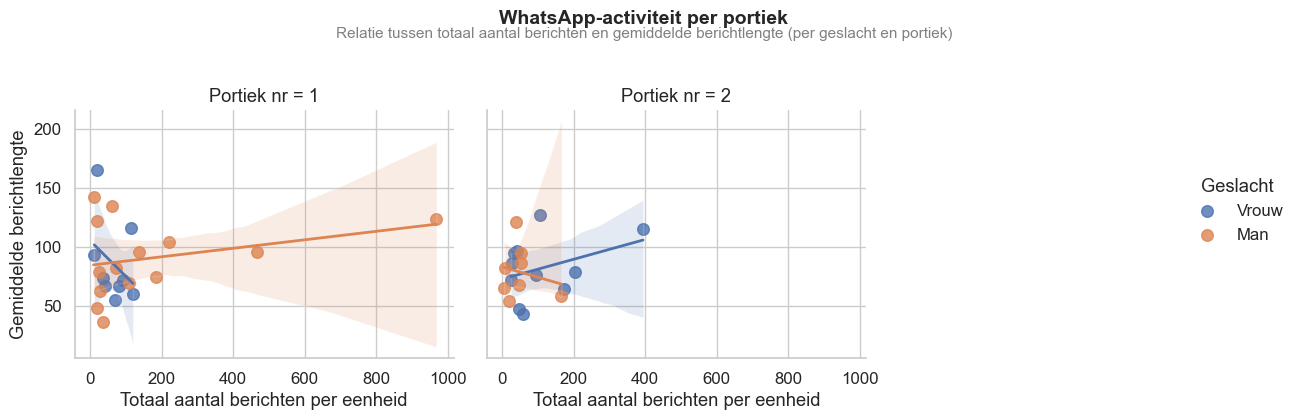

In [149]:
# %%
sns.set_theme(style="whitegrid", font_scale=1.1)

g = sns.lmplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Gender",
    col="Entrance_nr",
    col_wrap=3,
    height=4,
    scatter_kws={"s": 70, "alpha": 0.8},
    line_kws={"lw": 2},
)

# --- Update axis labels and main title ---
g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte")
g.fig.suptitle("WhatsApp-activiteit per portiek", y=1.05, fontsize=14, fontweight="bold")

# --- Add subtitle below main title ---
plt.figtext(
    0.5, 0.98,  # horizontal and vertical positioning (centered)
    "Relatie tussen totaal aantal berichten en gemiddelde berichtlengte (per geslacht en portiek)",
    ha="center",
    fontsize=11,
    color="gray"
)

# --- Replace 'Entrance_nr' with 'Portiek nr' in facet titles ---
for ax in g.axes.flat:
    title = ax.get_title()
    ax.set_title(title.replace("Entrance_nr", "Portiek nr"))

# --- Change legend title from 'Gender' to 'Geslacht' ---
if g._legend is not None:
    g._legend.set_title("Geslacht")

plt.tight_layout()
plt.show()


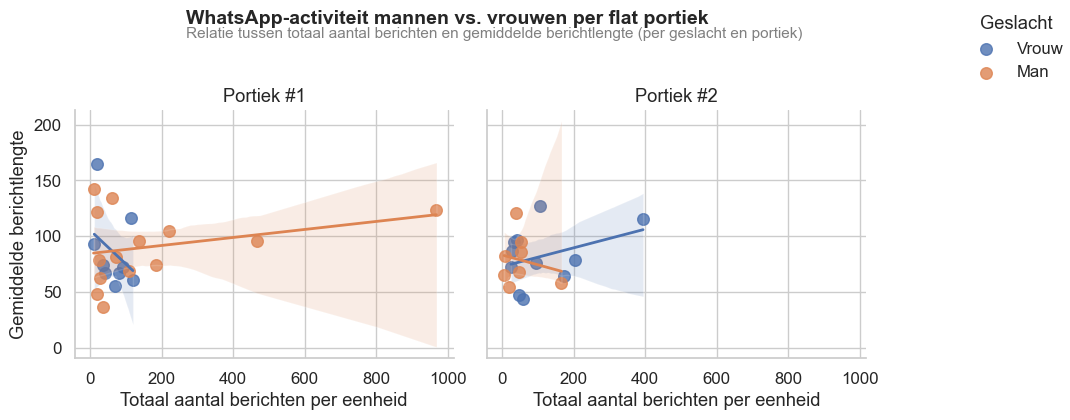

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.1)

g = sns.lmplot(
    data=unit_stats,
    x="total_messages",
    y="avg_msg_length",
    hue="Gender",
    col="Entrance_nr",
    col_wrap=3,
    height=4,
    scatter_kws={"s": 70, "alpha": 0.8},
    line_kws={"lw": 2},
)

# # --- Update axis labels and main title ---
# g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte")
# g.fig.suptitle("WhatsApp-activiteit mannen vs. vrouwen per flat portiek", y=1.05, fontsize=14, fontweight="bold")

# # --- Add subtitle below main title ---
# plt.figtext(
#     0.5, 0.98,  # horizontal and vertical positioning (centered)
#     "Relatie tussen totaal aantal berichten en gemiddelde berichtlengte (per geslacht en portiek)",
#     ha="center",
#     fontsize=11,
#     color="gray"
# )
# --- Update axis labels and main title ---
g.set_axis_labels("Totaal aantal berichten per eenheid", "Gemiddelde berichtlengte")
g.fig.suptitle(
    "WhatsApp-activiteit mannen vs. vrouwen per flat portiek",
    x=0.15,  # move left (0 = far left, 0.5 = center)
    y=1.05,
    fontsize=14,
    fontweight="bold",
    ha="left"  # align text to the left
)

# --- Add subtitle below main title ---
plt.figtext(
    0.15,  # move left (matching main title)
    0.98,
    "Relatie tussen totaal aantal berichten en gemiddelde berichtlengte (per geslacht en portiek)",
    ha="left",  # align text to the left
    fontsize=11,
    color="gray"
)


# # --- Replace 'Entrance_nr' with 'Portiek nr' in facet titles ---
# for ax in g.axes.flat:
#     title = ax.get_title()
#     ax.set_title(title.replace("Entrance_nr", "Portiek nr"))

# --- Replace 'Entrance_nr' with 'Portiek nr' in facet titles ---
for ax in g.axes.flat:
    title = ax.get_title()
    # Replace 'Entrance_nr = X' with 'Portiek #X'
    ax.set_title(title.replace("Entrance_nr = ", "Portiek #"))

# --- Adjust legend title and position ---
if g._legend is not None:
    g._legend.set_title("Geslacht")
    # Move legend to upper left inside figure
    g._legend.set_bbox_to_anchor((0.73, 1.05))  # x=0.02 moves it more to the left
    g._legend.set_loc('upper left')

plt.tight_layout()
plt.show()
